<a href="https://colab.research.google.com/github/SheldonFrank/copilot-codespaces-vscode/blob/main/notebooks/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.model_selection import train_test_split

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

housing["id"]

0        1565930130
1        3279000420
2         194000575
3        2115510160
4        7522500005
5        3787000140
6        7852110690
7        5469700260
8        8691410730
9         114100763
10       1257202430
11       7000100635
12       1900000195
13        251500330
14       7701960210
15       4037000065
16        522059299
17       6072300800
18       6821102358
19       5029450200
20       8860310240
21        826000295
22       9417400110
23       3959400345
24       8899000430
25       7527200030
26       8562720410
27       1432400335
28       6699940320
29       2525059172
30       7548301044
31       2141300420
32       5100401414
33       7346600092
34       6852700478
35         87000213
36       5416500260
37        322059097
38       7229900005
39       7116000350
40       3739500096
41       6744700900
42       1959700550
43       5589300435
44       1775920350
45       3750607974
46       5318100935
47       1442700430
48       9346700030
49       1841500050
50       7278100665
51       8635750980
52       6909700340
53       7011201475
54       9348500220
55       3876313170
56       2195700050
57       3760100200
58       3396800120
59       3750603685
60       9828702310
61       8656300380
62       1438000170
63       2423069164
64       2112700845
65       7635801370
66       8572900135
67       7504010590
68       6821100125
69       4310702775
70       2591010180
71       9828700235
72       9376301180
73       1646502355
74       1498301672
75       7715600070
76       7283900045
77        522069119
78       5200100125
79        826069184
80       3271300155
81       4444800045
82       8682291050
83       2770605420
84       1556200205
85        269000970
86       9264900880
87       2323059074
88       1224059053
89       3755500065
90       2571900430
91       3705000070
92        824069173
93       1735800050
94       3025059089
95       6132600655
96       1068000255
97       3052700921
98       3024089057
99       7390400026
100      1787600224
101      2923049372
102      7015201015
103      7701990040
104      1925059194
105       301401370
106      1931300955
107      2395710070
108      2591820070
109      7883604065
110       808300200
111      1421069159
112      8562780540
113      2787720300
114      2349300069
115       739000035
116      2397101460
117      7625702437
118      5101406441
119      3323500010
120       225039082
121      8078100260
122      4139480200
123      7436300160
124       822039004
125      8651442910
126      1370803510
127      3342100569
128      1310430400
129       104540820
130      4305500030
131       993000090
132      8044050040
133      5707500050
134      6306800080
135      9206700190
136      8732040090
137      3037200045
138       438000025
139       239000115
140      8929000230
141      7135520610
142      5561300340
143      9530100085
144      6613000140
145      8835210130
146      3782400190
147       379000051
148      3869900150
149      4322200050
150      8961980290
151      2558670110
152      1124000010
153      3869900138
154      7853300720
155       251300110
156      3904100041
157      7701990300
158      8682231190
159      7888200240
160      2025700730
161      3066410800
162      7576200040
163      2526069095
164      2781270530
165      3763300005
166      1523049083
167       923049468
168      3303700221
169      1502400140
170      2880100160
171      4083304535
172      8820902549
173      4139400060
174      1222069094
175      9367200205
176      2734100736
177      3856904580
178      3812400789
179      3303980090
180      1314300018
181      9522400350
182      7524350080
183      9406520260
184      3278602040
185      7696620100
186      3751600635
187      6365900065
188      8732800100
189      3876540410
190      7349660050
191      1036700220
192      5417600200
193      8732020310
194      6844703240
195       923059206
196      4038700220
197      2597520900
198      7203230040
199      8820903560


In [75]:
housing["major"] = housing["id"].map(lambda x: str(x)[0:6])
housing["minor"] = housing["id"].map(lambda x: str(x)[6:])

housing["major"].value_counts()

major
276760    62
510140    56
343850    49
154580    48
277060    46
982870    44
762570    44
137080    42
197220    41
751850    37
537980    36
602150    34
408330    33
125020    32
570000    32
388580    31
510040    30
712930    30
797260    29
402770    26
510451    26
682110    25
375160    25
785330    25
524980    24
802420    23
983420    23
177310    23
303420    22
927420    22
124500    22
952110    22
334210    22
277160    22
616390    22
327860    21
614560    21
387631    21
402410    21
444380    21
334390    21
402290    21
287710    21
405880    21
431070    21
563150    20
118000    20
745400    20
144640    20
926885    20
385690    20
868226    20
111800    20
123039    19
645030    19
865144    19
788360    19
955020    19
868228    18
611750    18
873198    18
379700    18
982820    18
795030    18
952810    18
336240    18
546950    17
701120    17
720233    17
868229    17
357530    17
723460    17
390490    17
285610    17
952310    17
160460    16
781280    16
415430    16
211370    16
929730    16
186240    16
954720    16
202570    16
723049    16
882090    16
125720    15
912610    15
329870    15
317910    15
567000    15
357480    15
265250    15
193130    15
239160    15
892900    15
722750    15
865140    15
638150    15
630000    15
407780    14
364910    14
123100    14
288770    14
789320    14
118900    14
720234    14
156810    14
785336    14
397170    14
312604    14
865161    14
108562    14
424069    14
940700    14
812210    13
766370    13
403680    13
856290    13
721140    13
785322    13
327780    13
335240    13
358590    13
177580    13
296880    13
701070    13
149830    13
421740    13
789380    13
276770    13
110500    13
789980    13
681780    13
322604    13
856279    13
768620    13
896480    13
282604    13
784920    13
720310    13
751900    13
375060    12
357840    12
785700    12
730430    12
865141    12
935800    12
362992    12
145360    12
890100    12
913610    12
247300    12
247310    12
436470    12
785202    12
333600    12
276960    12
333100    12
201140    12
722850    12
333050    12
276830    12
376050    12
809002    12
856278    12
722780    12
510453    12
940710    12
294600    12
812110    12
191100    12
292604    12
404720    12
363020    12
630340    12
430220    12
721265    12
630050    12
185308    12
290220    12
563450    12
246190    12
729960    12
438920    12
865830    12
362603    12
305270    12
263000    12
721573    11
785332    11
643050    11
926820    11
565260    11
335640    11
143800    11
102305    11
684470    11
925059    11
363012    11
531810    11
723750    11
928580    11
114100    11
401930    11
815160    11
192205    11
202504    11
947700    11
797720    11
243670    11
605610    11
639200    11
343250    11
390508    11
436520    11
681910    11
824059    11
873190    11
797990    11
868223    11
982670    11
344800    11
927620    11
512700    11
745250    11
291970    11
186890    11
262404    11
221590    10
754830    10
797420    10
947620    10
335340    10
259600    10
211270    10
277110    10
301330    10
224069    10
334330    10
193480    10
333300    10
145410    10
242006    10
641410    10
382531    10
176065    10
247337    10
570620    10
788960    10
614110    10
379350    10
382410    10
239710    10
678820    10
326230    10
812770    10
556130    10
993000    10
515160    10
247520    10
947720    10
531510    10
242405    10
291310    10
954280    10
278125    10
556140    10
390510    10
288320    10
541651    10
177100    10
541650    10
754980    10
721572    10
211470    10
501600    10
720322    10
198220    10
292270     9
182304     9
674470     9
524059     9
302605     9
733450     9
885600     9
856300     9
202604     9
144288     9
384510     9
390492     9
605611     9
388690     9
138730     9
503530     9
423290     9
785213     9
339504     9
954283     9
269560     9
350010     9
785201     9
102606     9
475000     9
289580     9
404660     9
232006     9
625049     9
220

This code will create a file named `housing_ids.csv` in your current working directory, containing only the `id` column from the `housing` DataFrame. The `index=False` argument prevents pandas from writing the DataFrame index as a column in the CSV file.

In [51]:
housing.head(10)

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  1565930130  20141104T000000         4       3.25         3760      4675   
1  3279000420  20150115T000000         3       1.75         1460      7800   
2   194000575  20141014T000000         4       1.00         1340      5800   
3  2115510160  20141208T000000         3       1.75         1440      8050   
4  7522500005  20140815T000000         2       1.50         1780      4750   
5  3787000140  20140901T000000         3       2.25         1780      9969   
6  7852110690  20140522T000000         4       2.50         2980      8107   
7  5469700260  20140903T000000         4       2.25         2530     24700   
8  8691410730  20150220T000000         4       2.50         3090      5600   
9   114100763  20140728T000000         3       0.75         1040     15000   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     2.0           0     0          3      8        2740           1020   
1     1.0           0     0          2      7        1040            420   
2     1.5           0     2          3      7        1340              0   
3     1.0           0     0          3      8        1440              0   
4     1.0           0     0          4      7        1080            700   
5     1.0           0     0          3      8        1450            330   
6     2.0           0     0          3      9        2980              0   
7     2.0           0     0          3      7        2530              0   
8     2.0           0     0          3      9        3090              0   
9     1.0           0     0          3      6        1040              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2007             0    98038  47.3862 -122.048           3280   
1      1979             0    98023  47.3035 -122.382           1310   
2      1914             0    98116  47.5658 -122.389           1900   
3      1985             0    98023  47.3187 -122.390           1790   
4      1947             0    98117  47.6859 -122.395           1690   
5      1985             0    98034  47.7286 -122.168           1950   
6      2000             0    98065  47.5389 -121.876           2750   
7      1974             0    98031  47.3939 -122.177           2650   
8      2005             0    98075  47.5970 -121.979           3080   
9      1941             0    98028  47.7639 -122.234           1410   

   sqft_lot15     price   major minor  
0        4033  429900.0  156593  0130  
1        7865  233000.0  327900  0420  
2        5800  455000.0  194000   575  
3        7488  258950.0  211551  0160  
4        5962  555000.0  752250  0005  
5        7974  450000.0  378700  0140  
6        7760  622500.0  785211  0690  
7       24700  340000.0  546970  0260  
8        5788  708000.0  869141  0730  
9       19000  230000.0  114100   763

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2177373654.py:8: SyntaxWarning: invalid escape sequence '\.'
  mortgage_rates['Date'] = mortgage_rates['Date'].astype(str).str.replace('\.0$', '', regex=True)


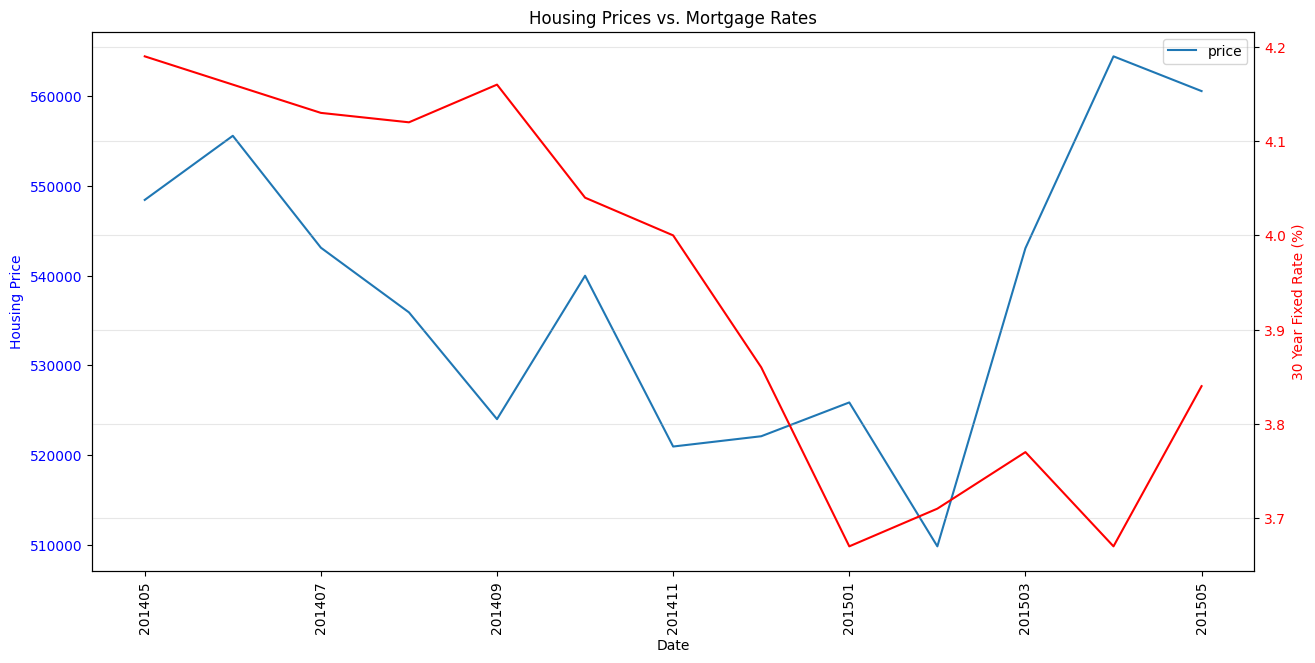

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

mortgage_rates = pd.read_csv("mortgage_rates.csv")
housing['month'] = housing['date'].map(lambda x: x[0:6])

# Convert 'Date' column in mortgage_rates to string 'YYYYMM' format
mortgage_rates['Date'] = mortgage_rates['Date'].astype(str).str.replace('\.0$', '', regex=True)

filtered_rates = mortgage_rates[mortgage_rates['Date'].isin(housing['month'])]

mean_price_by_date = housing.groupby('month')['price'].mean().reset_index()
mean_price_by_date.head()

fig, ax1 = plt.subplots(figsize=(15, 7))
mean_price_by_date.plot(x='month', y='price', rot=90, ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Housing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 3. Create a twin axis that shares the same x-axis
ax2 = ax1.twinx()
# Plot Mortgage Rates on the right y-axis (ax2)
ax2.plot(filtered_rates['Date'], filtered_rates['30 Year FRM'], color='red', label='30 Year FRM')
ax2.set_ylabel('30 Year Fixed Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 4. Final touches
plt.title('Housing Prices vs. Mortgage Rates')
plt.grid(True, alpha=0.3)
plt.show()

In [53]:
housing_merged = pd.merge(
    housing,
    filtered_rates[['Date', '30 Year FRM', '15 Year FRM']], # Select only needed columns
    left_on='month',
    right_on='Date',
    how='left' # Keep all housing rows, fill with NaN if no rate found
)

housing_final = housing_merged
housing_final["Date"] = housing_final["Date"].map(lambda x: int(x))

housing_final.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  1565930130  20141104T000000         4       3.25         3760      4675   
1  3279000420  20150115T000000         3       1.75         1460      7800   
2   194000575  20141014T000000         4       1.00         1340      5800   
3  2115510160  20141208T000000         3       1.75         1440      8050   
4  7522500005  20140815T000000         2       1.50         1780      4750   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     2.0           0     0          3      8        2740           1020   
1     1.0           0     0          2      7        1040            420   
2     1.5           0     2          3      7        1340              0   
3     1.0           0     0          3      8        1440              0   
4     1.0           0     0          4      7        1080            700   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2007             0    98038  47.3862 -122.048           3280   
1      1979             0    98023  47.3035 -122.382           1310   
2      1914             0    98116  47.5658 -122.389           1900   
3      1985             0    98023  47.3187 -122.390           1790   
4      1947             0    98117  47.6859 -122.395           1690   

   sqft_lot15     price   major minor   month    Date  30 Year FRM  \
0        4033  429900.0  156593  0130  201411  201411         4.00   
1        7865  233000.0  327900  0420  201501  201501         3.67   
2        5800  455000.0  194000   575  201410  201410         4.04   
3        7488  258950.0  211551  0160  201412  201412         3.86   
4        5962  555000.0  752250  0005  201408  201408         4.12   

   15 Year FRM  
0         3.19  
1         2.99  
2         3.21  
3         3.13  
4         3.25

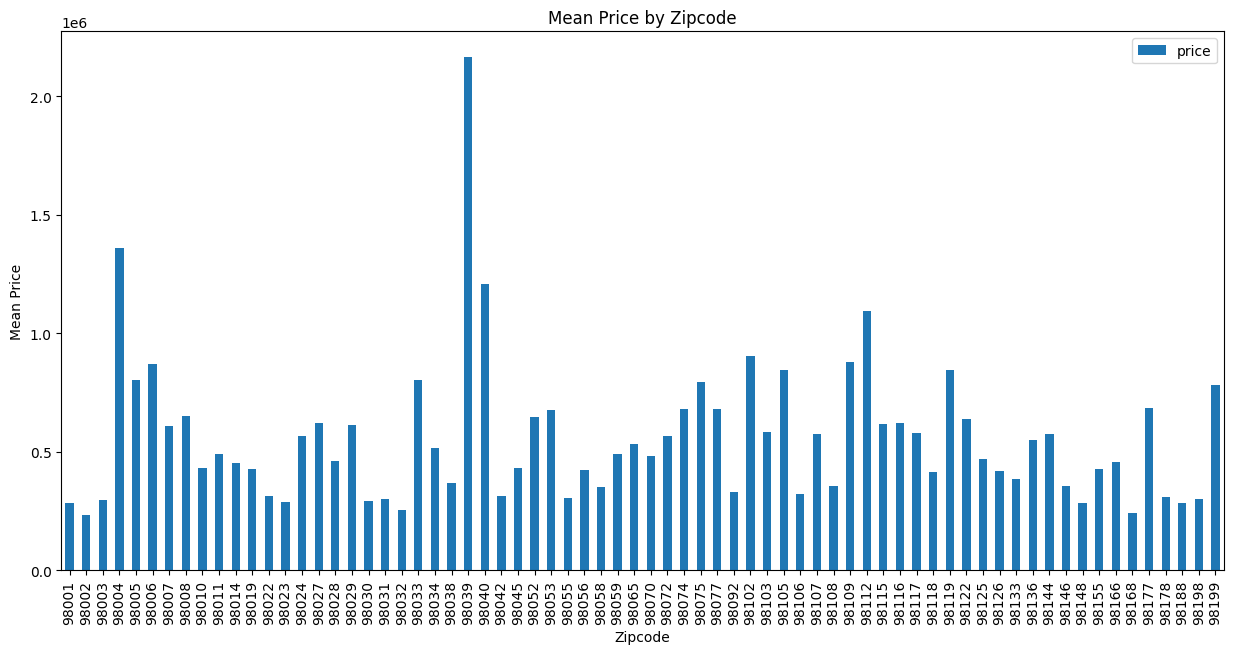

In [54]:
mean_price_by_zipcode = housing.groupby('zipcode')['price'].mean().reset_index()
ax = mean_price_by_zipcode.plot.bar(x='zipcode', y='price', rot=90, figsize=(15, 7))
plt.title('Mean Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Mean Price')
plt.show()

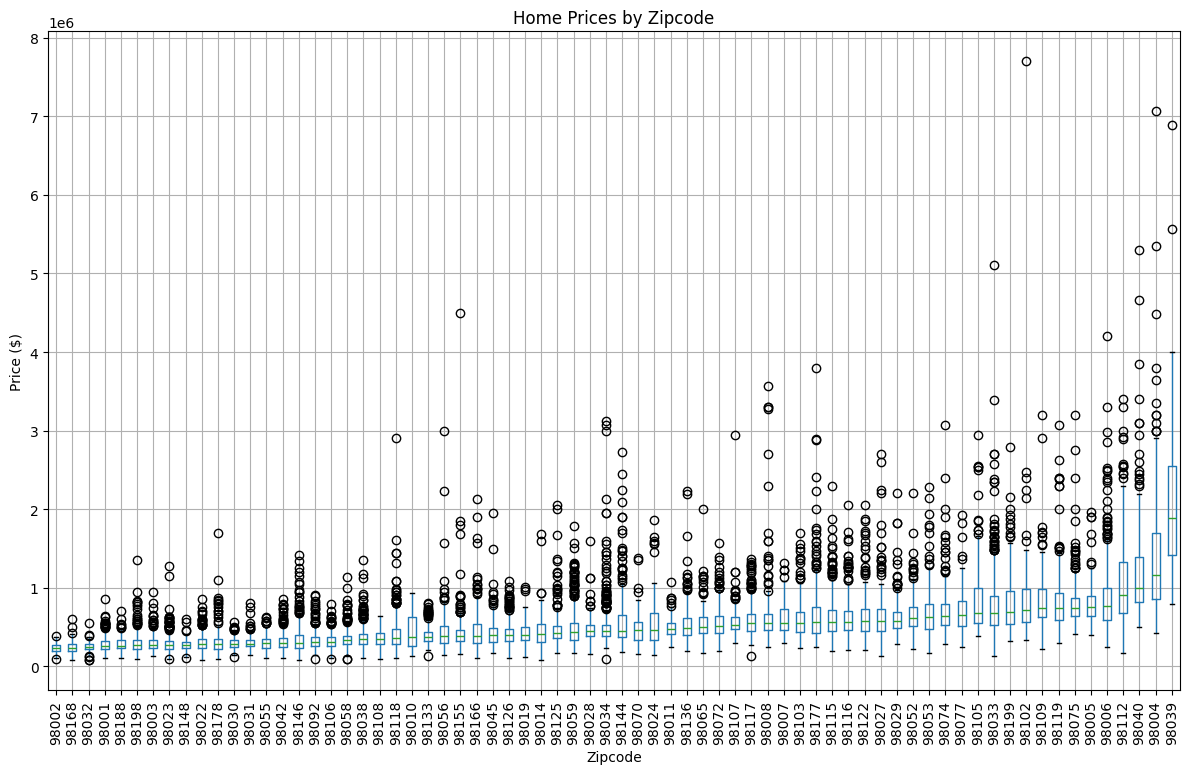

In [55]:
zipcodes = housing['zipcode'].value_counts()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import pandas as pd

# 1. Filter the data
plot_data = housing[housing['zipcode'].isin(zipcodes.index)].copy()

# 2. Calculate stats
stats = plot_data.groupby('zipcode')['price'].agg(['median', 'count'])
stats = stats.sort_values('median') # Sort by price
order = stats.index

# 3. Create vertical-friendly labels: "Zipcode \n (n=Count)"
# Using \n puts the count on a new line, making the label narrower
new_labels = [f"{z}\n(n={c})" for z, c in zip(order, stats['count'])]

# 4. Enforce order
plot_data['zipcode'] = pd.Categorical(
    plot_data['zipcode'],
    categories=order,
    ordered=True
)

fig, ax = plt.subplots(figsize=(12, 8))

plot_data.boxplot(column='price', by='zipcode', rot=90, vert=True, ax=ax)

ax.set_xlabel('Zipcode')
ax.set_ylabel('Price ($)')
plt.title('Home Prices by Zipcode')
plt.suptitle('')
plt.tight_layout()
plt.show()


In [56]:
housing.loc[housing['price'] > 3000000]

id             date  bedrooms  bathrooms  sqft_living  \
366    8907500070  20150413T000000         5       5.00         8000   
379    4389201095  20150511T000000         5       3.75         5020   
619    2470100110  20140804T000000         5       5.75         9200   
1120   3025059093  20140729T000000         5       5.25         5090   
1582   6447300265  20141014T000000         4       5.50         7080   
2106   7524900003  20141210T000000         2       1.75         6840   
2144   1346300150  20141020T000000         8       4.00         7710   
2174   8964800890  20150109T000000         3       3.25         4560   
2290   8106100105  20141114T000000         4       4.25         5770   
2564   7738500731  20140815T000000         5       5.50         6640   
3426   7558700030  20150413T000000         6       6.00         7390   
3680   7159200005  20140507T000000         7       4.50         6210   
4447   3126059023  20150303T000000         4       3.50         4730   
4858   1118000320  20150508T000000         4       4.00         4260   
4998   2303900100  20140911T000000         3       4.25         5510   
5290   9808700762  20140611T000000         5       4.50        10040   
5570   6072800246  20140702T000000         5       6.25         8020   
5906   9208900037  20140919T000000         6       7.75         9890   
6210   9253900271  20150107T000000         5       4.50         4850   
6317   3625049042  20141011T000000         5       6.00         5490   
7376    251500080  20140826T000000         4       4.00         4810   
8150    853200010  20140701T000000         5       5.50         7050   
8673   2525049148  20141007T000000         5       5.00         5450   
8721   7397300170  20140530T000000         4       3.50         5550   
8753   6762700020  20141013T000000         6       8.00        12050   
8903   9808100150  20150402T000000         5       3.75         5350   
9040   1732800780  20150212T000000         5       3.00         4150   
9642   3760500116  20141120T000000         3       2.50         3930   
10221   624069108  20140812T000000         4       3.25         7000   
10235  4131900066  20140825T000000         3       3.00         3920   
11429  2424049029  20140529T000000         6       4.25         6980   
11957   333100295  20141124T000000         3       3.50         4490   
12864  3835500195  20140618T000000         4       3.00         6430   
13055  1247600105  20141020T000000         5       5.25         8010   
13989  3225069065  20140624T000000         4       5.00         4550   
14203  1924059029  20140617T000000         5       6.75         9640   
15201  6065300370  20150506T000000         5       6.00         7440   
16753  3625059152  20141230T000000         3       3.25         4220   
17859  3625059043  20140904T000000         5       4.75         6200   
19938  9362000040  20140623T000000         3       4.50         5230   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
366       23985     2.0           0     4          3     12        6720   
379        8694     2.0           0     1          3     12        3970   
619       35069     2.0           0     0          3     13        6200   
1120      23669     2.0           0     0          3     12        5090   
1582      16573     2.0           0     0          3     12        5760   
2106      10000     2.5           1     4          3     11        4350   
2144      11750     3.5           0     0          5     12        6090   
2174      13363     1.0           0     4          3     11        2760   
2290      21300     2.0           1     4          4     11        5770   
2564      40014     2.0           1     4          3     12        6350   
3426      24829     2.0           1     4          4     12        5000   
3680       8856     2.5           0     2          5     11        4760   
4447      47870     1.0           1     4          3     10        2940   
4858      11

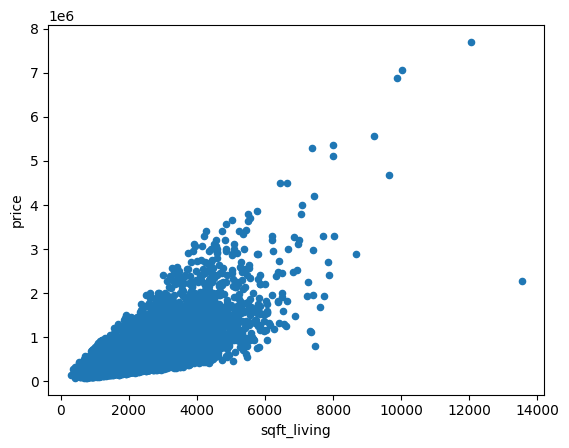

In [57]:
ax = housing.plot.scatter(x='sqft_living', y='price')
plt.show()

In [58]:
income_df = pd.read_csv('king_county_income.csv')

# 2. Ensure data types match (Crucial!)
# Zip codes can be read as numbers or strings. We convert both to strings
# to ensure they match perfectly during the merge.
housing_final['zipcode'] = housing_final['zipcode'].astype(str)

# 2. Force the 'Zipcode' column in your new INCOME data to string
income_df['Zipcode'] = income_df['Zipcode'].astype(str)

# 3. Merge the datasets
# We use 'left' merge to keep all rows in your original housing data,
# even if a zipcode is missing from the income list.
housing_final = pd.merge(
    housing_final,
    income_df,
    left_on='zipcode',   # The column name in your housing data
    right_on='Zipcode',  # The column name in your new csv
    how='left'
)

# 4. (Optional) Cleanup
# The merge might leave you with two zipcode columns (zipcode and Zipcode).
# You can drop the redundant one and rename the income column.
housing_final = housing_final.drop(columns=['Zipcode'])
housing_final = housing_final.rename(columns={'Median Household Income': 'median_income'})

housing_final.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  1565930130  20141104T000000         4       3.25         3760      4675   
1  3279000420  20150115T000000         3       1.75         1460      7800   
2   194000575  20141014T000000         4       1.00         1340      5800   
3  2115510160  20141208T000000         3       1.75         1440      8050   
4  7522500005  20140815T000000         2       1.50         1780      4750   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     2.0           0     0          3      8        2740           1020   
1     1.0           0     0          2      7        1040            420   
2     1.5           0     2          3      7        1340              0   
3     1.0           0     0          3      8        1440              0   
4     1.0           0     0          4      7        1080            700   

   yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0      2007             0   98038  47.3862 -122.048           3280   
1      1979             0   98023  47.3035 -122.382           1310   
2      1914             0   98116  47.5658 -122.389           1900   
3      1985             0   98023  47.3187 -122.390           1790   
4      1947             0   98117  47.6859 -122.395           1690   

   sqft_lot15     price   major minor   month    Date  30 Year FRM  \
0        4033  429900.0  156593  0130  201411  201411         4.00   
1        7865  233000.0  327900  0420  201501  201501         3.67   
2        5800  455000.0  194000   575  201410  201410         4.04   
3        7488  258950.0  211551  0160  201412  201412         3.86   
4        5962  555000.0  752250  0005  201408  201408         4.12   

   15 Year FRM  median_income  
0         3.19         124164  
1         2.99          87820  
2         3.21         124795  
3         3.13          87820  
4         3.25         146887

In [59]:
features_to_drop = ["price", 'id', 'date', 'yr_renovated', 'month', 'minor']
#housing_final["month"] = housing["month"].map(lambda x: int(x))
X = housing_final.drop(columns=features_to_drop)

X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         4       3.25         3760      4675     2.0           0     0   
1         3       1.75         1460      7800     1.0           0     0   
2         4       1.00         1340      5800     1.5           0     2   
3         3       1.75         1440      8050     1.0           0     0   
4         2       1.50         1780      4750     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built zipcode      lat  \
0          3      8        2740           1020      2007   98038  47.3862   
1          2      7        1040            420      1979   98023  47.3035   
2          3      7        1340              0      1914   98116  47.5658   
3          3      8        1440              0      1985   98023  47.3187   
4          4      7        1080            700      1947   98117  47.6859   

      long  sqft_living15  sqft_lot15   major    Date  30 Year FRM  \
0 -122.048           3280        4033  156593  201411         4.00   
1 -122.382           1310        7865  327900  201501         3.67   
2 -122.389           1900        5800  194000  201410         4.04   
3 -122.390           1790        7488  211551  201412         3.86   
4 -122.395           1690        5962  752250  201408         4.12   

   15 Year FRM  median_income  
0         3.19         124164  
1         2.99          87820  
2         3.21         124795  
3         3.13          87820  
4         3.25         146887

In [60]:
y = housing_final['price']

X = pd.get_dummies(X, columns=['zipcode', 'major'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#model = XGBRFRegressor(max_depth=5, n_estimators=1000, n_jobs=-1)
model = XGBRegressor(learning_rate=0.1,
                     n_estimators=1000,
                     n_jobs=-1,
                     max_depth=30,
                     )
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [72]:
# Assuming 'model' is your trained XGBRegressor
importances = model.feature_importances_
for each in importances:
  print(each)


0.00014848895
0.00086852064
0.005487542
0.00024485018
0.00016168803
0.044587146
0.0035256876
0.00023370636
0.07591503
0.000529684
0.00025664325
0.0013771438
0.0066359616
0.00285216
0.0010148494
0.00039611643
0.00017799664
0.0001753329
0.00017481907
0.0014850927
0.0
3.8597427e-05
0.008374283
0.0032274898
0.0019502387
4.740455e-05
5.383257e-05
5.7459074e-05
0.00020370579
0.00032457156
0.0026296605
0.00084851356
0.0003848288
0.00020062795
0.0002763397
0.00029703038
0.00010129136
1.5915872e-05
1.7550083e-05
2.2311366e-05
0.00022924095
0.0007633833
0.00034767162
0.004307423
0.0039021529
2.7686587e-05
1.9024168e-05
0.0001973278
0.00092229125
0.000103526574
0.0003905055
0.0008533812
0.00012444811
0.0007000105
0.0
0.00013916756
0.00067595835
0.0
6.364162e-05
2.9905801e-05
0.0006193403
0.00041004005
5.960131e-07
8.179253e-05
8.777163e-05
7.3369774e-05
0.00043889927
0.0025153067
0.00040784085
0.0016091752
0.001205425
0.0019384172
0.0008021274
0.0005090233
0.00011174459
0.00024282839
0.0001678740

In [73]:
predictions = model.predict(X_test)

In [74]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

#r_squared metric
r2 = r2_score(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(rmse)
print(r2)

149439.17163952353
0.851927409905005
